# FDA Course Homework 2

- **For this homework, please use the first 10000 rows**
- `pd_data = pd_data[:10000]`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

### Q1. Top-10 Reviewer

- Sort by number of reviews (hint : "ProfileName", "UserId")
- Also, show his/her average score

In [2]:
pd_data = pd.read_csv("Reviews.csv")
pd_data = pd_data[:10000]
#pd_data

In [3]:
score1=pd_data.groupby(["UserId", "ProfileName"])['Score'].agg(np.mean).reset_index(name='Score Mean')
scoremean=score1['Score Mean']

In [4]:
scorecount=pd_data.groupby(["UserId", "ProfileName"])['Score'].count().reset_index(name='Score count')

In [5]:
scorecount.insert(3,column='Score Mean',value=scoremean)

In [6]:
New_pd_data=scorecount.sort_values('Score count',ascending=False)
New_pd_data.head(10)

,UserId,ProfileName,Score count,Score Mean
2330,A1Z54EM24Y40LL,c2,17,3.882353
4286,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
5169,A35R32TA60XD57,M. Torma,9,4.111111
2919,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
6442,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
6330,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6493,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
8390,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
2826,A26NFIQ7KWI8Y7,kt rose,6,2.666667
31,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


### Q2. Plot score distribution for the user with the most number of reviews

In [7]:
a=New_pd_data.iloc[0,0]

In [8]:
dis=pd_data[pd_data['UserId'] == a ]

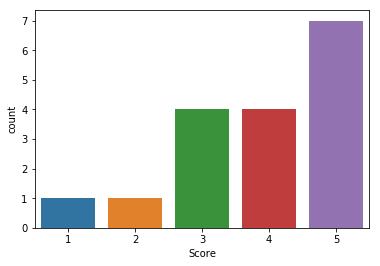

In [9]:
sns.countplot(x='Score',data=dis)

### Q3. Plot pandas Series DataFrame (Time->Date)

- axis-X : Date of reviews (transfer column "Time" -> Date)
- axis-Y : Numbers of reviews in the date interval
- Type : bar graph

In [10]:
year = pd_data.drop(columns=['ProductId','UserId','ProfileName', 'HelpfulnessNumerator','HelpfulnessDenominator','Score', 'Summary','Text'])
year['Year']=pd.to_datetime(pd_data['Time'], unit='s').dt.year
year=year.groupby('Year')['Year'].count().reset_index(name='yearcount')
#year

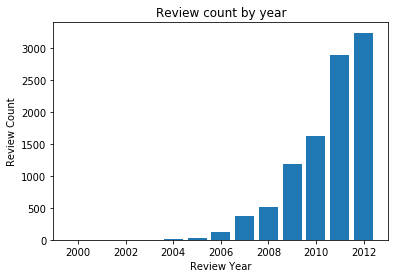

In [11]:
x=year.loc[:,'Year']
y=year.loc[:,'yearcount']
plt.bar(x,y)
plt.xlabel('Review Year')
plt.ylabel('Review Count')
plt.title('Review count by year')
plt.show()

### Q4. Plot HeatMap using seaborn
- Correlation between numeric features (Id, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time)

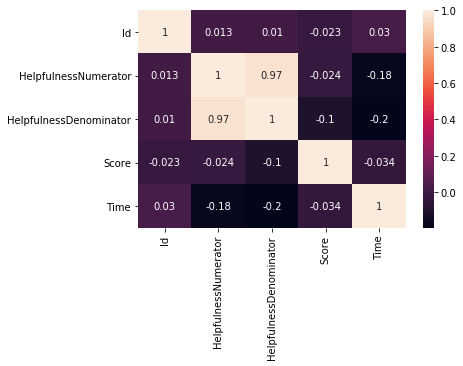

In [12]:
heat_data=pd_data[['Id','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time']]
heat_correlation=heat_data.corr()
sns.heatmap(heat_correlation,annot=True)
plt.show()

### Q5. Helpful percent
- If viewers of that comment upvote the comment, then it adds to Helpfulness numerator.
- If viewers of that comment just make a comment, then it adds to Helpfulness denominator.
- **Note : you should filter out some cases with numerator > denominator**
- Plot the distribution of helpful percent (hint: .hist())

- **Ratio = -1, if both Helpfulness numerator & Helpfulness denominator are zero.**

In [13]:
pd_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [14]:
pd_data['test']=pd_data['HelpfulnessNumerator']-pd_data['HelpfulnessDenominator']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,test
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,0
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,0
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,0
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0


In [15]:
pd_data['Totalcomment']=pd_data['HelpfulnessNumerator']+pd_data['HelpfulnessDenominator']
pd_data['Helpfulpercent']=pd_data['HelpfulnessNumerator']/pd_data['HelpfulnessDenominator']
a=-1
pd_data['Helpfulpercent'].fillna(a, inplace = True)
pd_data.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,test,Totalcomment,Helpfulpercent
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0,2,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,0,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0,2,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,6,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0,0,-1.0


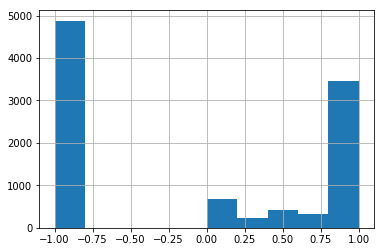

In [16]:
x=pd_data.loc[:,'Helpfulpercent']
plt.hist(x)
plt.grid()
plt.show()